<a href="https://colab.research.google.com/github/SafiyaJan/CNN-Classifier-for-CIFAR10/blob/master/Q1Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
# fig, axs = plt.subplots(1,2, figsize=(10,5))

#   axs[0].plot(history.history['loss'],'r')
#   axs[0].plot(history.history['val_loss'],'b')
#   axs[0].legend(['Training loss', 'Validation Loss'])
#   axs[0].set_xlabel('Number of Epochs')
#   axs[0].set_ylabel('Loss')
#   axs[0].set_title('Loss Curves')

#   axs[1].plot(history.history['accuracy'],'r')
#   axs[1].plot(history.history['val_accuracy'],'b')
#   axs[1].legend(['Training Accuracy', 'Validation Accuracy'])
#   axs[1].set_xlabel('Number of Epochs')
#   axs[1].set_ylabel('Accuracy')
#   axs[1].set_title('Accuracy Curves')

#   fig.tight_layout (pad = 3)


In [215]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import random
import numpy as np
import matplotlib.pyplot as plt

In [216]:
def load_data():
  # load the dataset
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  
  # seperate data set into training and testing set
  indices = list(range(x_train.shape[0]))
	
	# Retrieving 20 percent of loaded training set
  num_training_instances = int(0.2 * x_train.shape[0]) 
	
	# shuffle data 
  random.seed(10)
  np.random.shuffle(indices)
  train_indices = indices[:num_training_instances]
	
	# save training data
  x_data_train, y_data_train = x_train[train_indices],y_train[train_indices]

  # normal train and test set and return the splits
  return x_data_train/255, y_data_train, x_test/255, y_test

In [217]:
def MLP(num_layers,num_neurons, x_train, y_train, x_test, y_test):

  # # retrieve the train and set splits
  # x_train, y_train, x_test, y_test = load_data()

  # print (len(x_train))
  # print (len(y_test))

  # # convert labels to one-hot-encoding
  # y_train = to_categorical(y_train, num_classes=10)
  # y_test = to_categorical(y_test, num_classes=10)


  # build the model
  MLPmodel = Sequential()
  MLPmodel.add(Flatten(input_shape=x_train.shape[1:]))

  for i in range(num_layers):
    MLPmodel.add(Dense(num_neurons, activation='sigmoid'))

  MLPmodel.add(Dense(10, activation='softmax' ))
  
  MLPmodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  history = MLPmodel.fit(x_train, y_train, epochs=5, batch_size = 32, 
                         validation_data=(x_test,y_test), verbose=0)
  
  # test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
  # print('\nTest accuracy:', test_acc)
  
  return MLPmodel, history


In [218]:
def CNN1(x_train, y_train, x_test, y_test):

  # # retrieve the train and set splits
  # x_train, y_train, x_test, y_test = load_data()

  # print (len(x_train))
  # print (len(y_test))

  # # convert labels to one-hot-encoding
  # y_train = to_categorical(y_train, num_classes=10)
  # y_test = to_categorical(y_test, num_classes=10)

  # build the model
  CNN1model = Sequential()
  CNN1model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
  CNN1model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
  CNN1model.add(Flatten())
  CNN1model.add(Dense(512, activation='sigmoid'))
  CNN1model.add(Dense(512, activation='sigmoid'))
  CNN1model.add(Dense(10, activation='softmax'))

  CNN1model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  history = CNN1model.fit(x_train, y_train, epochs=5, batch_size = 32, 
                         validation_data=(x_test,y_test),verbose=0)
  
  # test_loss, test_acc = CNN1model.evaluate(x_test,  y_test, verbose=0)
  # print('\nTest accuracy:', test_acc)
  
  return CNN1model, history
  
  # test_loss, test_acc = CNN1model.evaluate(x_test,  y_test, verbose=2)
  # print('\nTest accuracy:', test_acc)



In [219]:
def CNN2(x_train, y_train, x_test, y_test):

  # # retrieve the train and set splits
  # x_train, y_train, x_test, y_test = load_data()

  # print (len(x_train))
  # print (len(y_test))

  # # convert labels to one-hot-encoding
  # y_train = to_categorical(y_train, num_classes=10)
  # y_test = to_categorical(y_test, num_classes=10)

  # build the model
  CNN2model = Sequential()
  CNN2model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
  CNN2model.add(MaxPooling2D((2, 2)))
  CNN2model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
  CNN2model.add(MaxPooling2D((2, 2)))
  CNN2model.add(Flatten())
  CNN2model.add(Dense(512, activation='sigmoid'))
  CNN2model.add(Dropout(0.2))
  CNN2model.add(Dense(512, activation='sigmoid'))
  CNN2model.add(Dropout(0.2))
  CNN2model.add(Dense(10, activation='softmax'))

  CNN2model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  history = CNN2model.fit(x_train, y_train, epochs=5, batch_size = 32, 
                         validation_data=(x_test,y_test), verbose=0)
  
  # test_loss, test_acc = CNN2model.evaluate(x_test,  y_test, verbose=2)
  # print('\nTest accuracy:', test_acc)
  
  return CNN2model, history

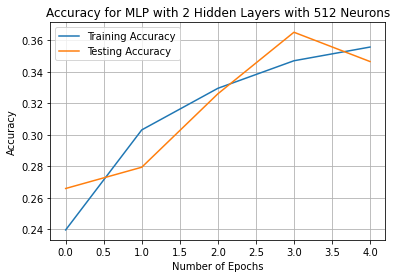

In [220]:
def MLP_curves():

  # retrieve the train and set splits
  x_train, y_train, x_test, y_test = load_data()
  
  # convert labels to one-hot-encoding
  y_train = to_categorical(y_train, num_classes=10)
  y_test = to_categorical(y_test, num_classes=10)
  
  # plotting loss and accuracy for MLP w/ 2 H-layers and 512 neurons
  model,history = MLP(2,512,x_train, y_train, x_test, y_test)

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.legend(['Training Accuracy', 'Testing Accuracy'])
  plt.xlabel('Number of Epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy for MLP with 2 Hidden Layers with 512 Neurons')
  plt.grid()
  plt.show()

  # plotting acc for varying numbers of layers 
  # test_acc = []
  # train_acc = []

  # for i in range (6):
  #   model, history = MLP(i,512,x_train, y_train, x_test, y_test)
  #   train_acc.append(history.history['accuracy'][4])
  #   test_acc.append(history.history['val_accuracy'][4])
  
  # x_axis = list(np.arange(1,7,1))  

  # plt.xlabel("Number of Layers")
  # plt.ylabel("Accuracy (%)")
  # plt.title("Accuracy of Training/Testing Data vs Number of Hidden Layers")
  # plt.plot(x_axis,train_acc, label = "Training Accuracy")
  # plt.plot(x_axis,test_acc, label = "Testing Accuracy")
  # plt.legend()
  # plt.grid()

  # plt.show()
  
  # # plotting acc for varying numbers of neurons
  # test_acc = []
  # train_acc = []

  # num_neurons = [100,200,300,400,500,600,700,800]

  # for i in num_neurons:
  #   model, history = MLP(2,i,x_train, y_train, x_test, y_test)
  #   train_acc.append(history.history['accuracy'][4])
  #   test_acc.append(history.history['val_accuracy'][4])


  # plt.xlabel("Number of Hidden Neurons")
  # plt.ylabel("Accuracy (%)")
  # plt.title("Accuracy of Training/Testing Data vs Number of Hidden Neurons")
  # plt.plot(num_neurons,train_acc, label = "Training Accuracy")
  # plt.plot(num_neurons,test_acc, label = "Testing Accuracy")
  # plt.legend()
  # plt.grid()

  # plt.show()
MLP_curves()

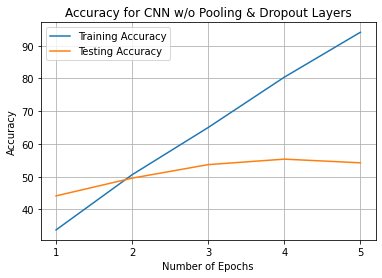

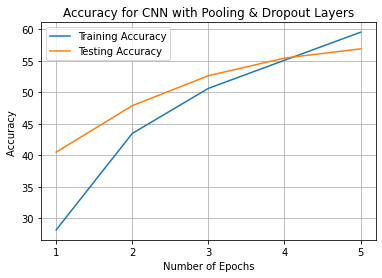

In [221]:
def CNN_curves():

  # retrieve the train and set splits
  x_train, y_train, x_test, y_test = load_data()
  
  # convert labels to one-hot-encoding
  y_train = to_categorical(y_train, num_classes=10)
  y_test = to_categorical(y_test, num_classes=10)
  
  # plotting loss and accuracy for CNN w/o pooling and dropout layer
  model,history = CNN1(x_train, y_train, x_test, y_test)

  x_axis = list(np.arange(1,6,1))  

  plt.plot(x_axis,np.asarray(history.history['accuracy'])*100)
  plt.plot(x_axis,np.asarray(history.history['val_accuracy'])*100)
  plt.legend(['Training Accuracy', 'Testing Accuracy'])
  plt.xlabel('Number of Epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy for CNN w/o Pooling & Dropout Layers')
  plt.xticks(np.arange(1, 6, 1)) 
  plt.grid()
  plt.show()

  # plotting loss and accuracy for CNN w/o pooling and dropout layer
  model,history = CNN2(x_train, y_train, x_test, y_test)

  plt.plot(x_axis,np.asarray(history.history['accuracy'])*100)
  plt.plot(x_axis,np.asarray(history.history['val_accuracy'])*100)
  plt.legend(['Training Accuracy', 'Testing Accuracy'])
  plt.xlabel('Number of Epochs')
  plt.ylabel('Accuracy ')
  plt.title('Accuracy for CNN with Pooling & Dropout Layers')
  plt.xticks(np.arange(1, 6, 1)) 
  plt.grid()
  plt.show()


CNN_curves()
